In [2]:
import numpy as np
from sklearn.manifold import TSNE

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [31]:
mnist_train = np.load('data/mnist_train.npy')
X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')

mnist_test = np.load('data/mnist_test.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

In [32]:
%%time
# X_embedded = TSNE(n_components=2).fit_transform(X_test)
# np.load('data/X_test_2d_embedded.npy', X_embedded)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


In [33]:
X_test_embedded = np.load('data/X_test_2d_embedded.npy')

/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


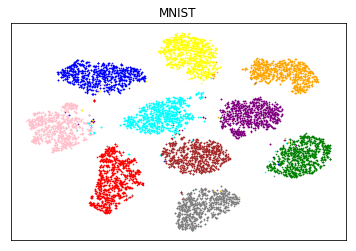

In [37]:
# colors= ['#12efff','#eee111','#eee00f','#e00fff','#123456','#abc222','#000000','#123fff','#1eff1f','#2edf4f','#2eaf9f','#22222f']
colors = ['green', 'red', 'blue', 'yellow', 'brown', 'orange', 'grey', 'pink', 'purple', 'cyan']
# cmap = matplotlib.cm.tab10
cmap = ListedColormap(colors)
for i, c in enumerate(cmap.colors):
    X = X_test_embedded[y_test == i]
    plt.scatter(X[:,0], X[:,1], color=c, s=0.4)
plt.xticks([])
plt.title("MNIST")
plt.yticks([])
plt.legend()
plt.savefig("figs/embeddings_visualisation.png", bbox_inches='tight')

# n-MNIST

In [18]:
import scipy.io

def load_data(DATA_DIR):
    rows, cols = 28, 28
    nb_classes = 10

    mat = scipy.io.loadmat(DATA_DIR)
    print(list(mat.keys()))
    X_train = mat['train_x']
    Y_train = np.argmax(mat['train_y'], axis=-1)
    X_test = mat['test_x']
    Y_test = np.argmax(mat['test_y'], axis=-1)
    
    # Reshape and format input
    
    #Renormalize images
    X_train = X_train.astype('float32')
    X_train /= 255.0
    X_test = X_test.astype('float32')
    X_test /= 255.0

    return (X_train, Y_train, X_test, Y_test)

_, _, noisy_imgs, noisy_y = load_data('data/mnist-with-awgn.mat')

print(noisy_imgs.shape)
print(noisy_y.shape)

['__version__', '__header__', 'train_y', 'test_y', '__globals__', 'test_x', 'train_x']
(10000, 784)
(10000,)


In [21]:
from get_mnist_features import get_gp_mnist_data
noisy_X = get_gp_mnist_data('my_model.h5', noisy_imgs.reshape(-1, 28,28,1))
print(noisy_X.shape)

(10000, 128)


In [22]:
%%time
noisy_X_embedded = TSNE(n_components=2).fit_transform(noisy_X)
np.save('data/noisy_X_train_2d_embedded.npy', noisy_X_embedded)

CPU times: user 4min 13s, sys: 20.4 s, total: 4min 34s
Wall time: 4min 34s


In [24]:
noisy_X_embedded = np.load('data/noisy_X_train_2d_embedded.npy')

In [25]:
print(noisy_X_embedded.shape)

(10000, 2)


/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


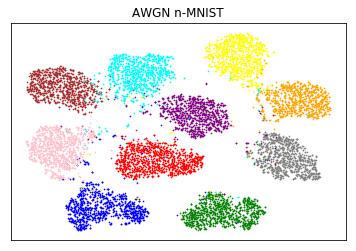

In [36]:
%matplotlib inline
# colors= ['#12efff','#eee111','#eee00f','#e00fff','#123456','#abc222','#000000','#123fff','#1eff1f','#2edf4f','#2eaf9f','#22222f']
colors = ['green', 'red', 'blue', 'yellow', 'brown', 'orange', 'grey', 'pink', 'purple', 'cyan']
# cmap = matplotlib.cm.tab10
cmap = ListedColormap(colors)
for i, c in enumerate(cmap.colors):
    X = noisy_X_embedded[noisy_y == i]
    plt.scatter(X[:,0], X[:,1], color=c, s=0.4)
plt.xticks([])
plt.title("AWGN n-MNIST")
plt.yticks([])
plt.legend()
plt.savefig("figs/noisy_embeddings_visualisation.png", bbox_inches='tight')